# Scoring

In this notebook we use the code we have implemented to assess the saftey based on rules 1 and 2 of RSS

In [12]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes, NuScenesExplorer

import numpy as np

from minf_part1_functions import *
from my_nuscenes_functions import *

dataroot = 'data/sets/nuscenes'

nusc = NuScenes(version='v1.0-mini', dataroot=dataroot, verbose=False)

scene = nusc.scene[0]
sample = nusc.get('sample', scene['first_sample_token'])

scores = []
instances = []
done = False
while not done:
    for ann in sample['anns']:
        instance_token = nusc.get('sample_annotation', ann)['instance_token']
        instance = nusc.get('instance', instance_token)
        category = nusc.get('category', instance['category_token'])['name']
        if instance_token not in instances and 'vehicle' in category:
            s = generate_scores_for_instance(nusc, instance_token)
            scores.append((instance_token, min(s)))
            instances.append(instance_token)

    if sample['next']:
        sample = nusc.get('sample', sample['next'])
    else:
        done = True

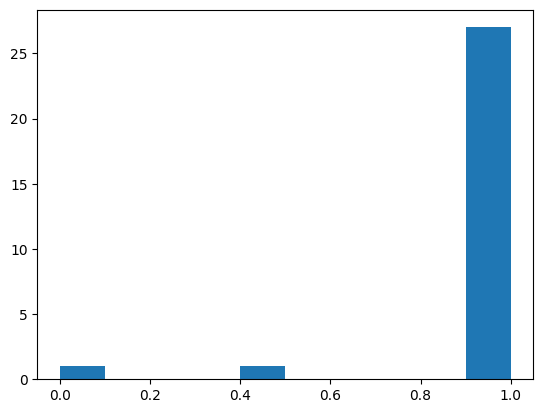

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist([v for (_, v) in scores])
plt.show()